<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/ROC_~_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **I am interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. I would like to construct and evaluate a model that predicts whether a future customer would be satisfied with airline's services given previous customer feedback about their flight experience.**

## **The data for this notebook is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. My goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.**

In [49]:
# importing libs :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# important imports for preprocessing, modeling, and evaluation :

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# visualization package imports :

import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# load the dataset :

df = pd.read_csv("/content/Invistico_Airline.csv")

In [51]:
df.head

<bound method NDFrame.head of         satisfaction      Customer Type  Age   Type of Travel     Class  \
0          satisfied     Loyal Customer   65  Personal Travel       Eco   
1          satisfied     Loyal Customer   47  Personal Travel  Business   
2          satisfied     Loyal Customer   15  Personal Travel       Eco   
3          satisfied     Loyal Customer   60  Personal Travel       Eco   
4          satisfied     Loyal Customer   70  Personal Travel       Eco   
...              ...                ...  ...              ...       ...   
129875     satisfied  disloyal Customer   29  Personal Travel       Eco   
129876  dissatisfied  disloyal Customer   63  Personal Travel  Business   
129877  dissatisfied  disloyal Customer   69  Personal Travel       Eco   
129878  dissatisfied  disloyal Customer   66  Personal Travel       Eco   
129879  dissatisfied  disloyal Customer   38  Personal Travel       Eco   

        Flight Distance  Seat comfort  Departure/Arrival time conveni

## **Data Preparation :**
### After loading the dataset, I prepare the data to be suitable for a logistic regression model. This includes :

In [52]:
# EXPLORING THE DATASET :

print(df.dtypes)

# Check the number of satisfied customers in the dataset :
# To predict customer satisfaction, I need to know how many customers in the dataset are satisfied before modeling :

print("\n") # leave a space

print(df["satisfaction"].value_counts(dropna = False))

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

##**Key insights :**
###There were 71,087 satisfied customers and 58,793 dissatisfied customers.
###54.7 percent (71,087/129,880) of customers were satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy.

In [53]:
# CHECK FOR THE MISSING VALUES :

# An assumption of logistic regression models is that there are no missing values.

df.isnull().sum()


satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## **For now, the missing values should be removed for two reasons :**
### There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.
### This column might impact the relationship between entertainment and satisfaction.

In [54]:
# drop the rows with missing values and save the resulting pandas DataFrame in a variable named df_subset :

df_subset = df.dropna(axis = 0).reset_index(drop = True)

In [55]:
df_subset

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129483,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129484,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129485,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [56]:
# PREPARING THE DATA :

# I want to create a plot (sns.regplot) of my model to visualize results later in the notebook.
# So the "independent" variable "Inflight entertainment" cannot be "of type int" and the "dependent" variable "satisfaction" cannot be "of type object."

# converting "Inflight entertainment" to a "float" :
df_subset = df_subset.astype({"Inflight entertainment" : float})

In [57]:
# ENCODING THE DATA :

# Convert the categorical column satisfaction into numeric through one-hot encoding :
df_subset["satisfaction"] = OneHotEncoder(drop = "first").fit_transform(df_subset[["satisfaction"]]).toarray()

In [58]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [59]:
df_subset.dtypes

satisfaction                         float64
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment               float64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [60]:
# CREATE TRAINING AND TESTING DATA :

# 70% of the data into a training set and the remaining 30% into a testing set

X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **Model Building :**

### Fit a LogisticRegression Model to the data

In [61]:
lr = LogisticRegression().fit(X_train, y_train)

In [62]:
# OBTAIN ESTIMATE PARAMS :

print(lr.coef_)
print(lr.intercept_)

[[0.99751462]]
[-3.19355406]


### Creating a Plot using Seaborn for data viz.

<Axes: xlabel='Inflight entertainment', ylabel='satisfaction'>

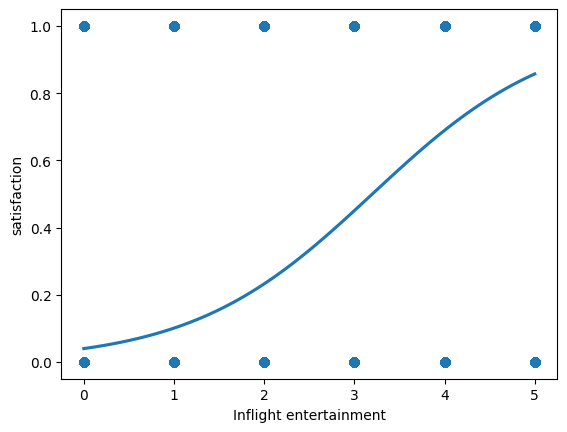

In [63]:
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

## **Key insights :**
### The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

## **Results and Evaluation :**

### Predict the outcome for the test dataset

In [64]:
y_pred = lr.predict(X_test)

In [66]:
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

### Use predict_proba to get prob outputs

In [65]:
lr.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

### Analyze the Results

In [67]:
print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.802
Precision: 0.816
Recall: 0.822
F1 Score: 0.819


### Confusion Matrix

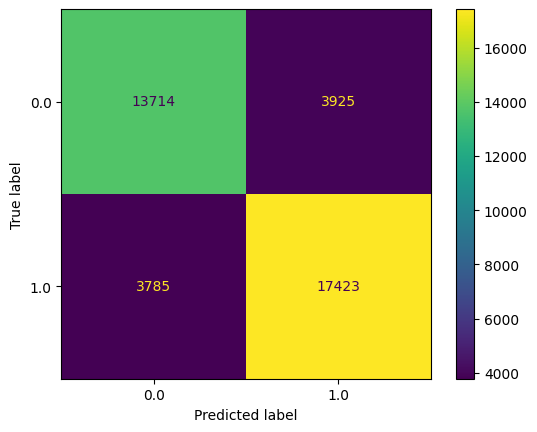

In [68]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = lr.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()

## **Key insights :**

### Two of the quadrants are under 4,000, which are relatively low numbers.
### Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.
### There isn't a large difference in the number of false positives and false negatives.

## **Conclusions :**

### **Findings :**

### Logistic regression accurately predicted satisfaction 80.2 percent of the time.
### The confusion matrix is useful, as it displays a similar amount of true positives and true negatives.


### **Recommendations :**

### Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction.
### The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent.
### The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers.